In [4]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1erk6hE0F0-1bYrTU-TNUNMeJv4n_sikK' -O autosales.csv


--2025-10-18 09:13:49--  https://docs.google.com/uc?export=download&id=1erk6hE0F0-1bYrTU-TNUNMeJv4n_sikK
Resolving docs.google.com (docs.google.com)... 74.125.26.138, 74.125.26.102, 74.125.26.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.26.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1erk6hE0F0-1bYrTU-TNUNMeJv4n_sikK&export=download [following]
--2025-10-18 09:13:49--  https://drive.usercontent.google.com/download?id=1erk6hE0F0-1bYrTU-TNUNMeJv4n_sikK&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.134.132, 2607:f8b0:400c:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.134.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473787 (463K) [application/octet-stream]
Saving to: ‘autosales.csv’

autosales.csv       100%[===================>] 462.68K  --.-KB/s    in 0.00

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('autosales.csv')
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [7]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


Line Plot

In [8]:
data.columns


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [9]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data['Year'] = data['ORDERDATE'].dt.year

/tmp/ipython-input-114652884.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])


In [10]:
product_life = data.groupby('PRODUCTLINE').agg(
    min_year=('Year', 'min'),
    max_year=('Year', 'max')
)

product_life['range'] = product_life['max_year'] - product_life['min_year']

In [11]:
product_life.sort_values(['range'], ascending=False).head(5)

,min_year,max_year,range
PRODUCTLINE,,,
Classic Cars,2018,2020,2
Motorcycles,2018,2020,2
Planes,2018,2020,2
Ships,2018,2020,2
Trains,2018,2020,2


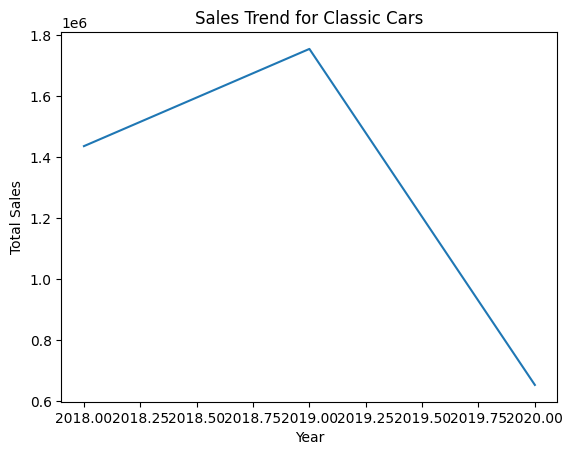

In [12]:
pl = data.loc[data['PRODUCTLINE'] == 'Classic Cars']

# Group by year and calculate total sales
sales_trend = pl.groupby('Year', as_index=False)['SALES'].sum()

# Plot sales trend
sns.lineplot(x='Year', y='SALES', data=sales_trend)
plt.title('Sales Trend for Classic Cars')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

Style and Labelling

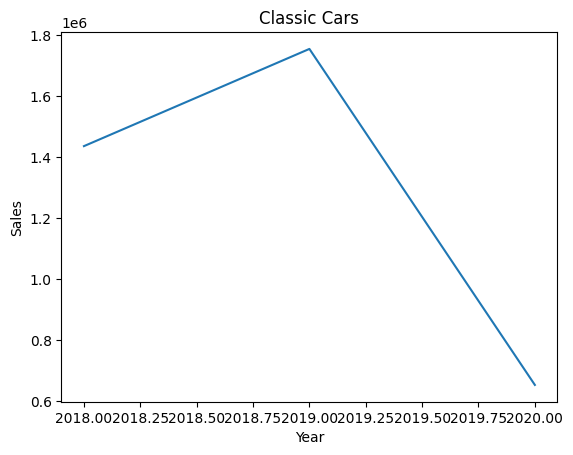

In [13]:
plt.title('Classic Cars')
plt.xlabel('Year')
plt.ylabel('Sales')
sns.lineplot(x='Year', y='SALES', data=sales_trend)
plt.show()

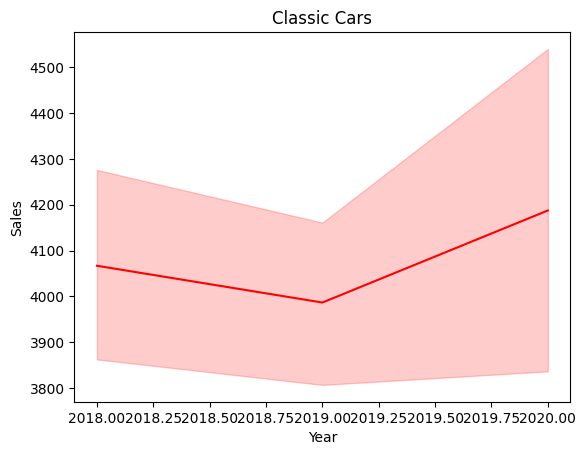

In [14]:
# Filter data for Classic Cars
cc = data.loc[data['PRODUCTLINE'] == 'Classic Cars']

# Plotting
plt.title('Classic Cars')
plt.xlabel('Year')
plt.ylabel('Sales')
sns.lineplot(x='Year', y='SALES', data=cc, color='r')
plt.show()

show the values from years 2018.75-2019.50

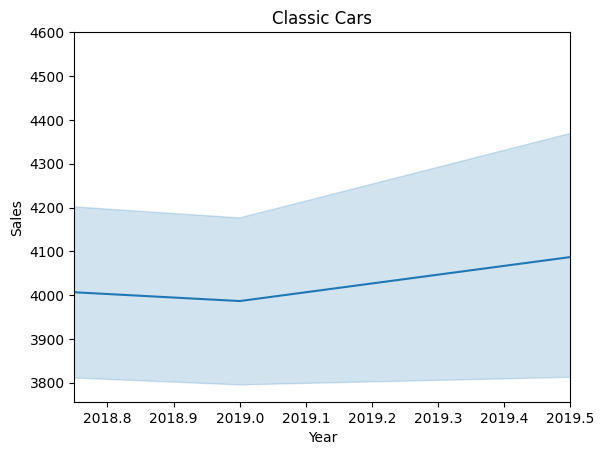

In [15]:
plt.title('Classic Cars')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xlim(left=2018.75,right=2019.50)
sns.lineplot(x='Year', y='SALES', data=cc)
plt.show()

 first plot the trend for "Motorcycle"

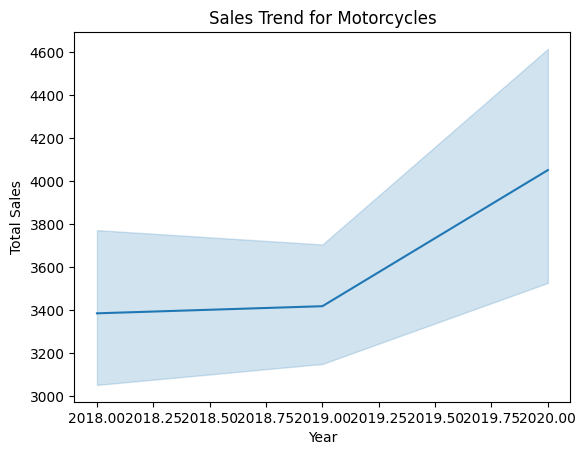

In [16]:
motorcycles = data.loc[data['PRODUCTLINE']=='Motorcycles']
sns.lineplot(x='Year', y='SALES', data=motorcycles)
plt.title('Sales Trend for Motorcycles')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

<Axes: xlabel='Year', ylabel='SALES'>

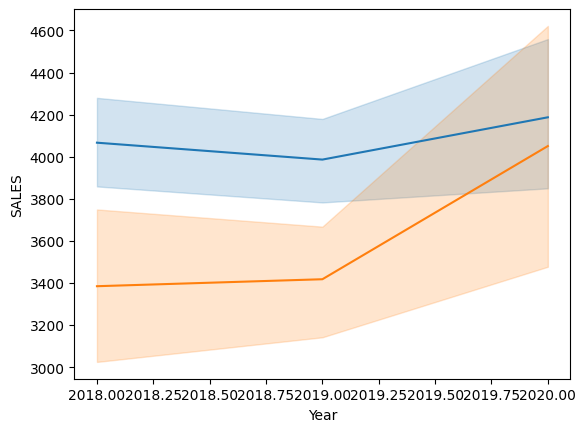

In [17]:
sns.lineplot(x='Year', y='SALES', data=cc)
sns.lineplot(x='Year', y='SALES', data=motorcycles)

<Axes: xlabel='Year', ylabel='SALES'>

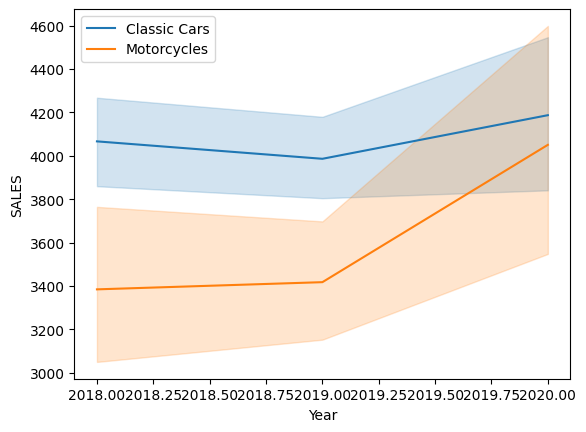

In [18]:
sns.lineplot(x='Year', y='SALES', data=cc, label='Classic Cars')
sns.lineplot(x='Year', y='SALES', data=motorcycles, label='Motorcycles')

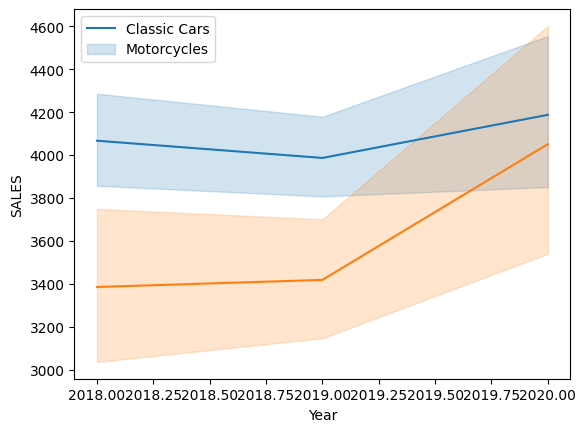

In [19]:
sns.lineplot(x='Year', y='SALES', data=cc)
sns.lineplot(x='Year', y='SALES', data=motorcycles)
plt.legend(['Classic Cars','Motorcycles'])
plt.show()

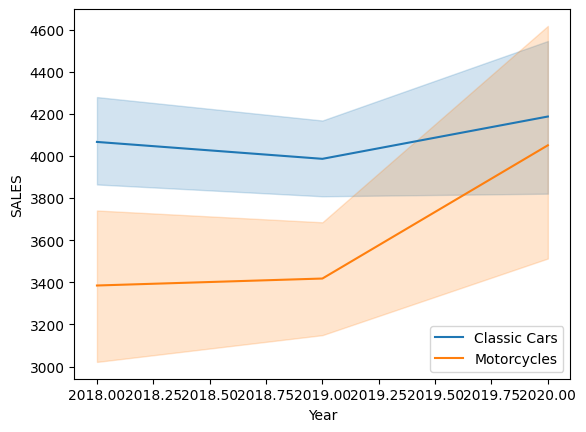

In [20]:
sns.lineplot(x='Year', y='SALES', data=cc, label='Classic Cars')
sns.lineplot(x='Year', y='SALES', data=motorcycles, label='Motorcycles')
plt.legend(loc='lower right')
plt.show()

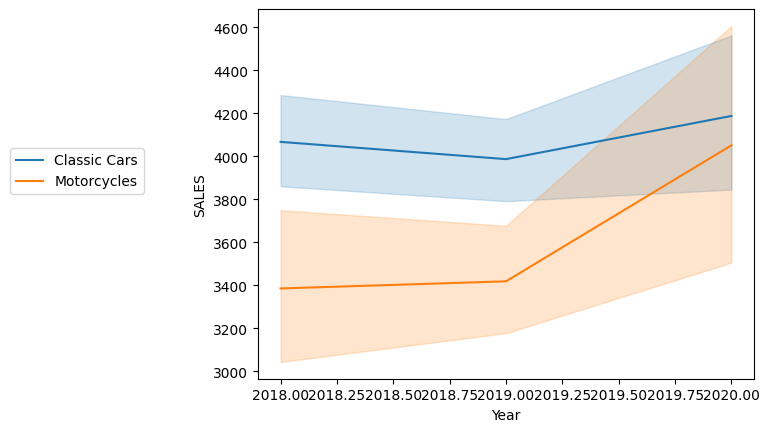

In [21]:
sns.lineplot(x='Year', y='SALES', data=cc, label='Classic Cars')
sns.lineplot(x='Year', y='SALES', data=motorcycles, label='Motorcycles')
plt.legend(loc=(-0.5,0.5))
plt.show()

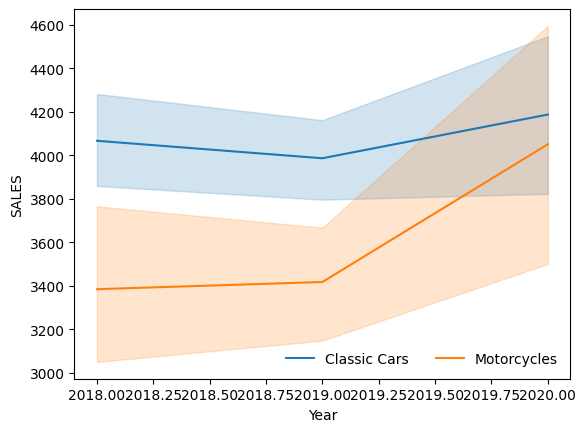

In [22]:
sns.lineplot(x='Year', y='SALES', data=cc, label='Classic Cars')
sns.lineplot(x='Year', y='SALES', data=motorcycles, label='Motorcycles')
plt.legend(loc='lower right', ncol=2, frameon=False)
plt.show()

In [23]:
print(max(cc['SALES']))

12001.0


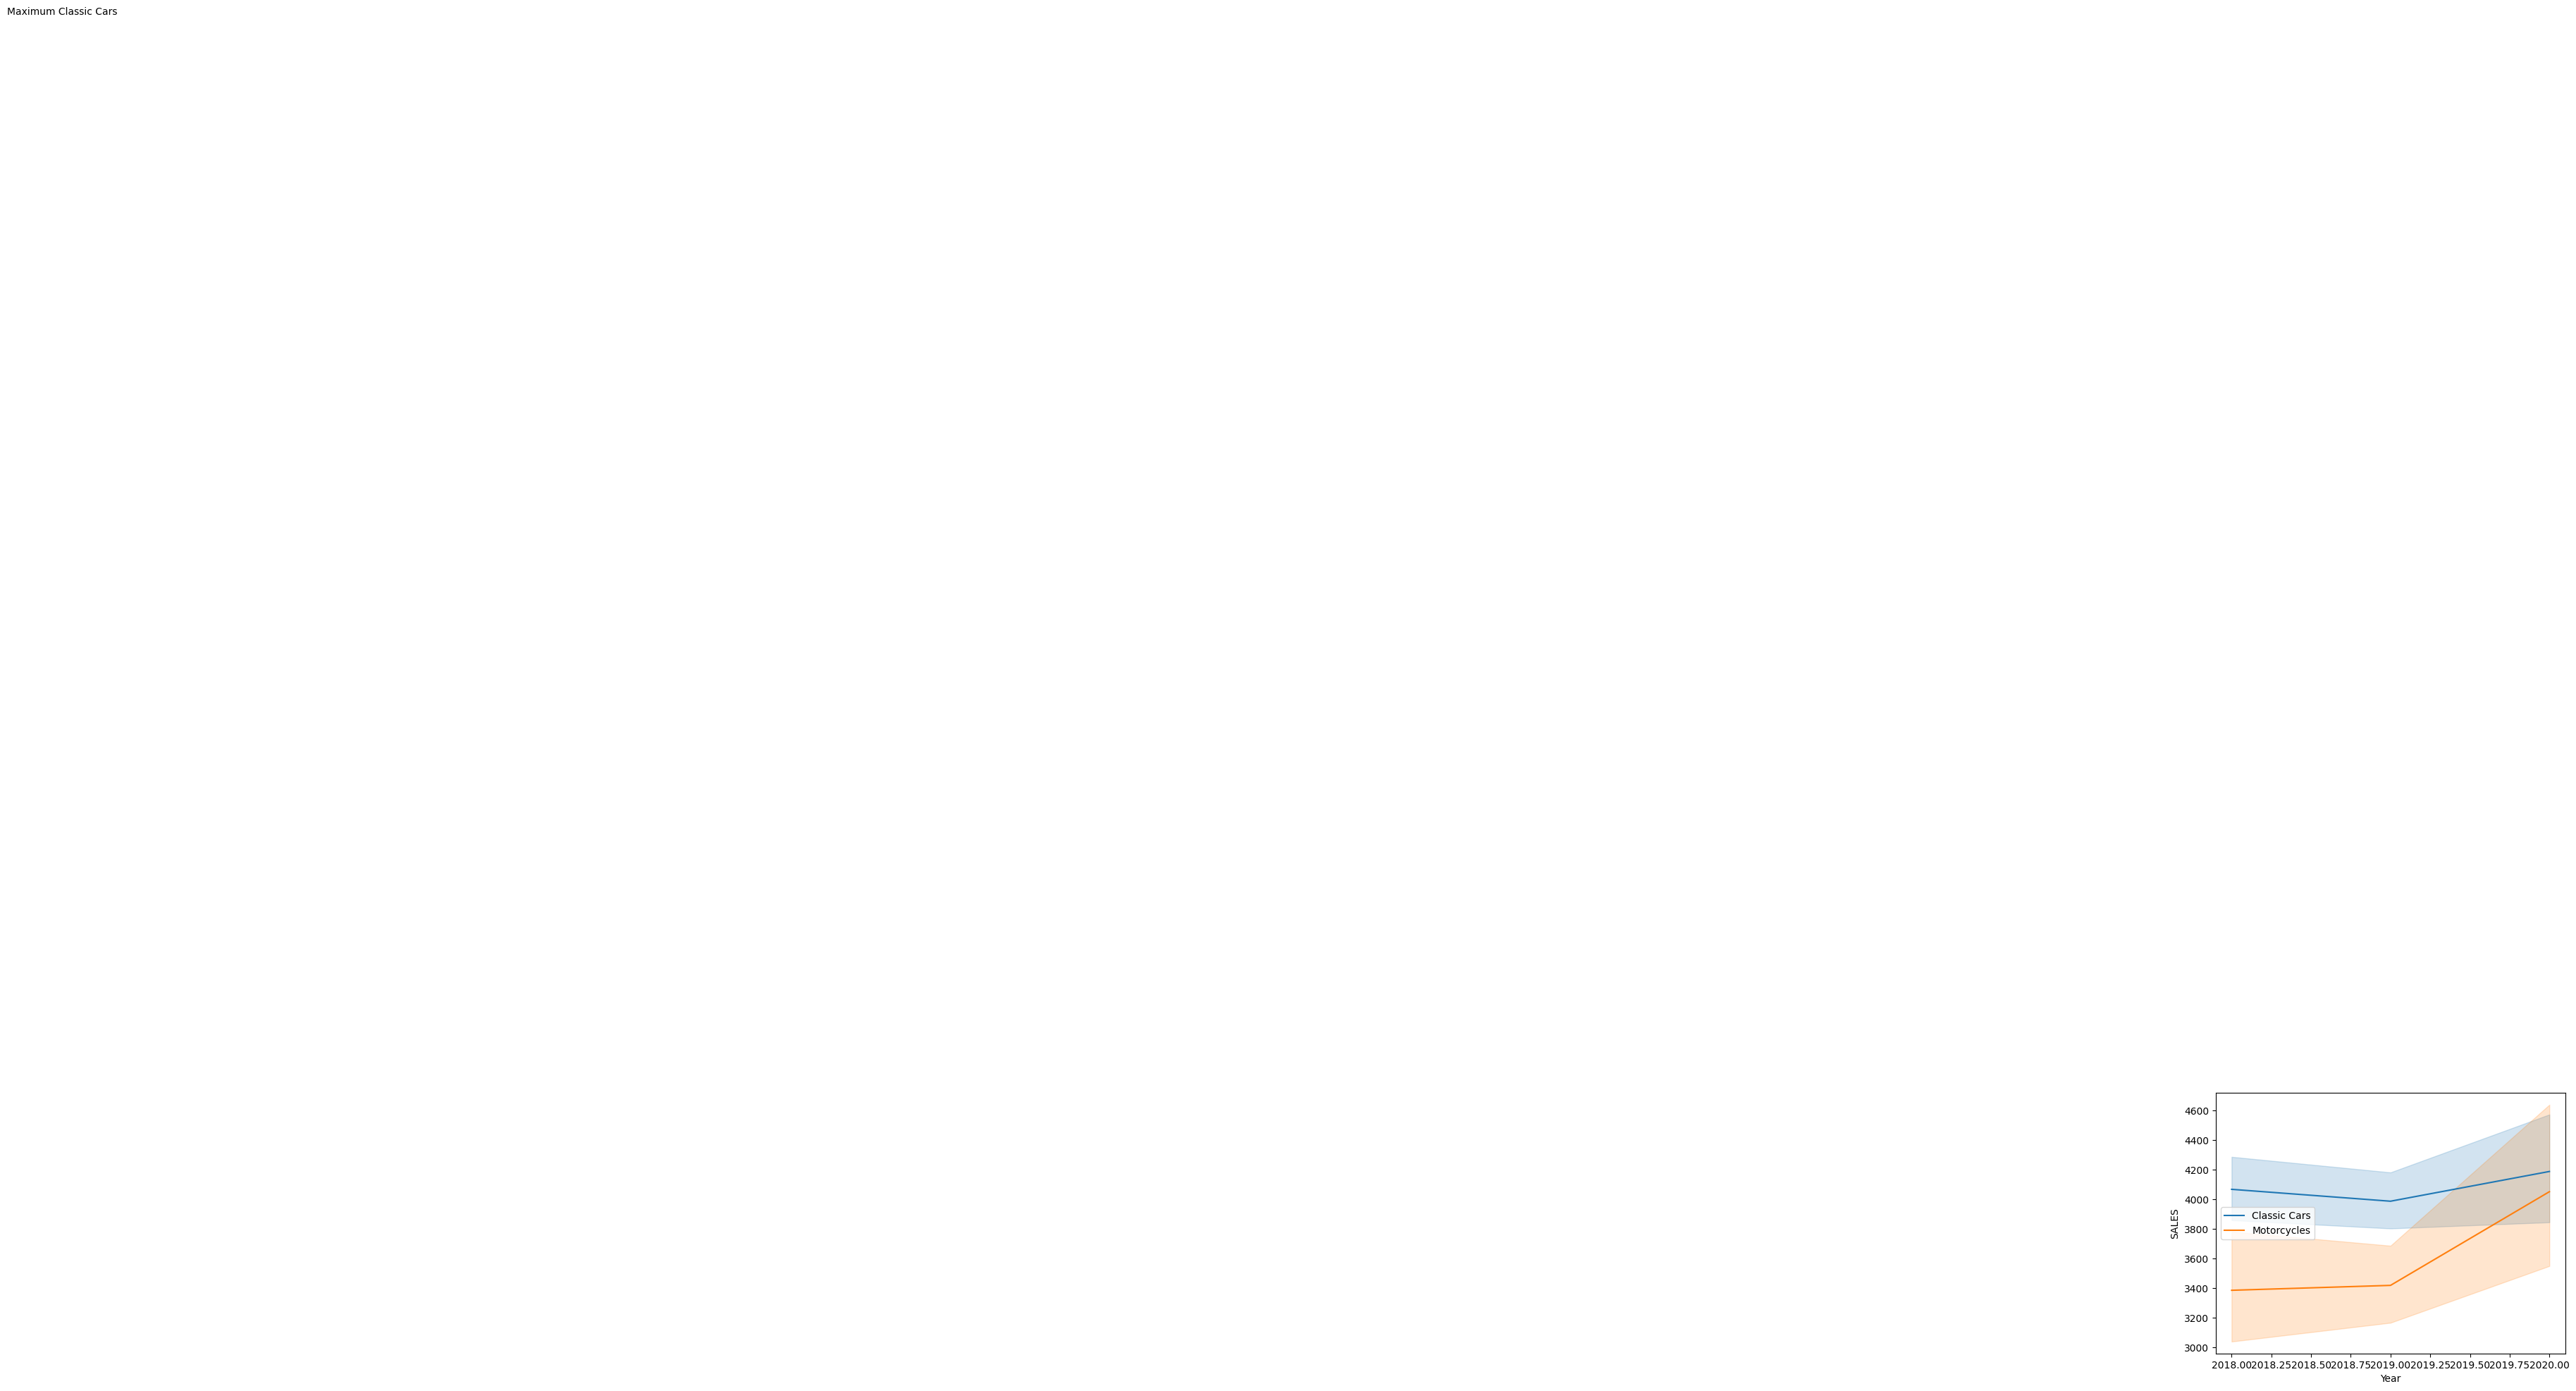

In [24]:
sns.lineplot(x='Year', y='SALES', data=cc, label='Classic Cars')
sns.lineplot(x='Year', y='SALES', data=motorcycles, label='Motorcycles')
plt.legend(loc='center left')
plt.text(2004,max(cc['SALES']), 'Maximum Classic Cars')
plt.show()

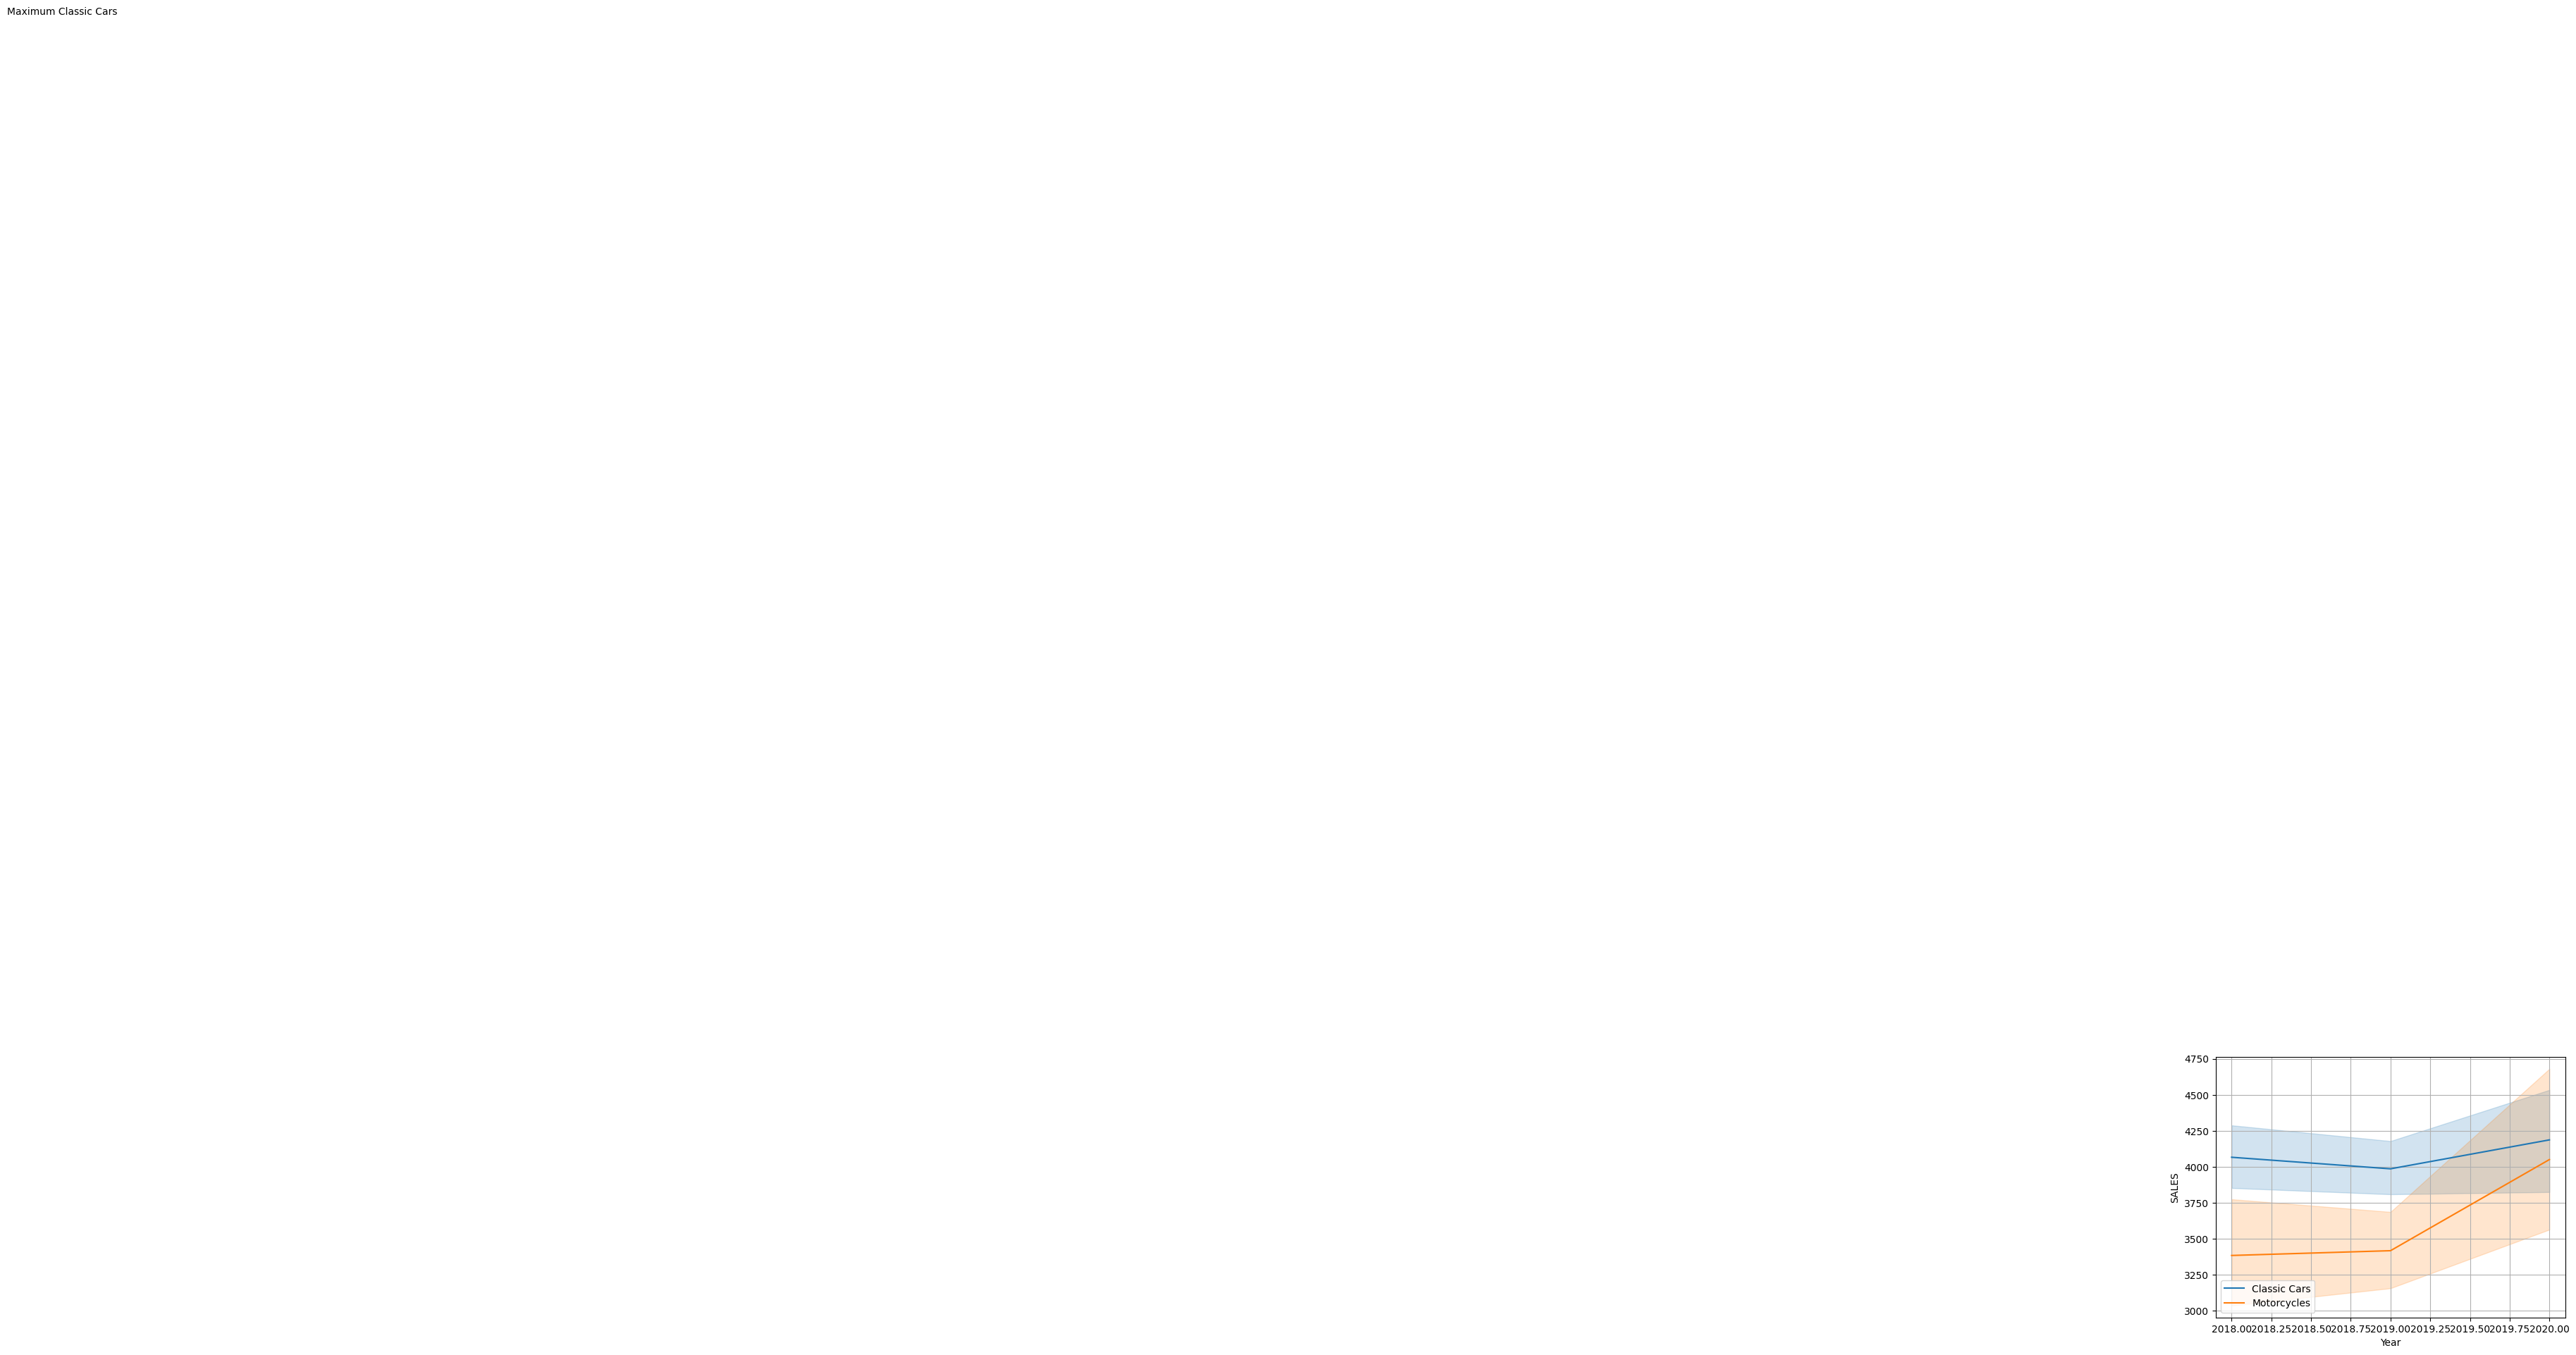

In [25]:
sns.lineplot(x='Year', y='SALES', data=cc, label='Classic Cars')
sns.lineplot(x='Year', y='SALES', data=motorcycles, label='Motorcycles')
plt.legend(loc='lower left')
plt.text(2004,max(cc['SALES']), 'Maximum Classic Cars')
plt.grid()
plt.show()

Scatter Plot

In [26]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Year
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2018
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,2018
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,2018
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,2018
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,2018


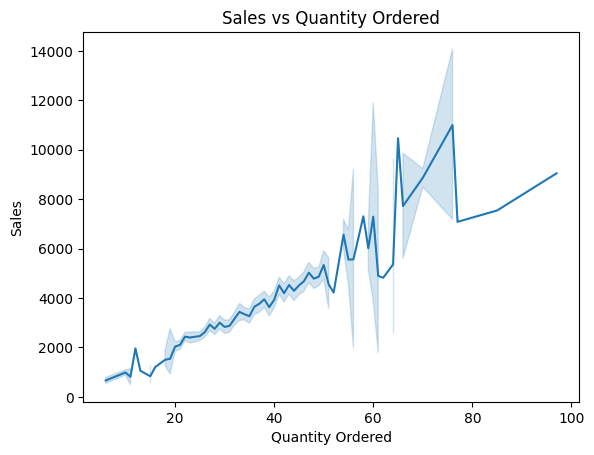

In [27]:
sns.lineplot(data=data, x='QUANTITYORDERED', y='SALES')
plt.title('Sales vs Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()

<Axes: xlabel='QUANTITYORDERED', ylabel='SALES'>

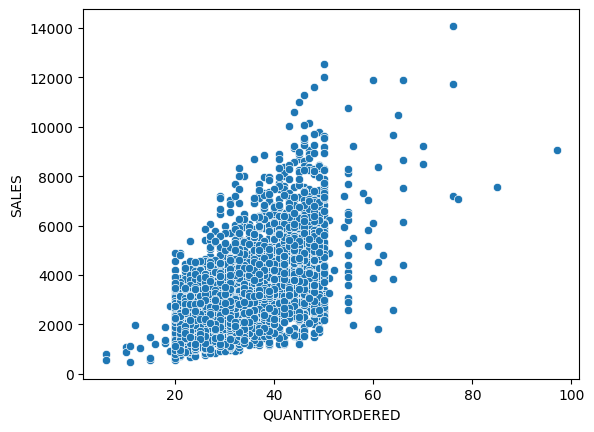

In [28]:
sns.scatterplot(data=data, x='QUANTITYORDERED', y='SALES')

In [29]:
top3_productline = data['PRODUCTLINE'].value_counts().index[:3]
top3_dealsize = data['DEALSIZE'].value_counts().index[:3]
top3_country = data['COUNTRY'].value_counts().index[:3]
top3_data = data.loc[(data["PRODUCTLINE"].isin(top3_productline)) & (data["DEALSIZE"].isin(top3_dealsize)) & (data['COUNTRY'].isin(top3_country))]
top3_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Year
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,2018
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,2018
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,2018
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,2018
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,10348,32,82.83,7,2650.56,2019-11-01,2773,Shipped,Classic Cars,101,...,"Corrida Auto Replicas, Ltd",(91) 555 22 82,"C/ Araquil, 67",Madrid,28023,Spain,Sommer,Mart¡n,Small,2019
2561,10358,27,139.31,3,3761.37,2019-12-10,2735,Shipped,Classic Cars,101,...,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium,2019
2562,10371,34,126.51,3,4301.34,2020-01-23,2692,Shipped,Classic Cars,101,...,Mini Gifts Distributors Ltd.,4155551450,5677 Strong St.,San Rafael,97562,USA,Nelson,Valarie,Medium,2020
2563,10382,34,54.84,9,1864.56,2020-02-17,2668,Shipped,Classic Cars,101,...,Mini Gifts Distributors Ltd.,4155551450,5677 Strong St.,San Rafael,97562,USA,Nelson,Valarie,Small,2020


Dodged Countplot

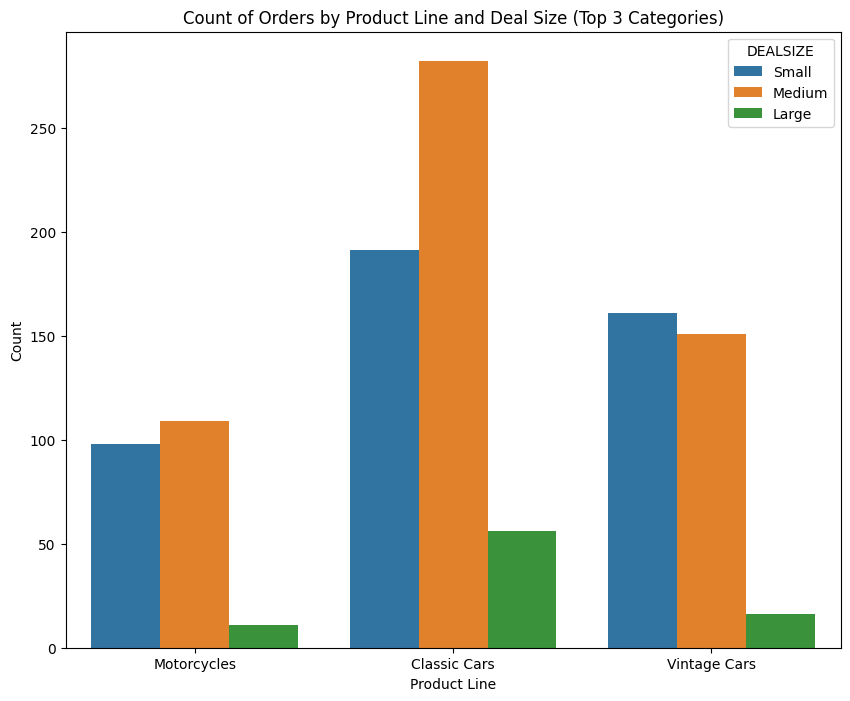

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(x='PRODUCTLINE', hue='DEALSIZE', data=top3_data)
plt.ylabel('Count')
plt.xlabel('Product Line')
plt.title('Count of Orders by Product Line and Deal Size (Top 3 Categories)')
plt.show()

Stacked Countplot

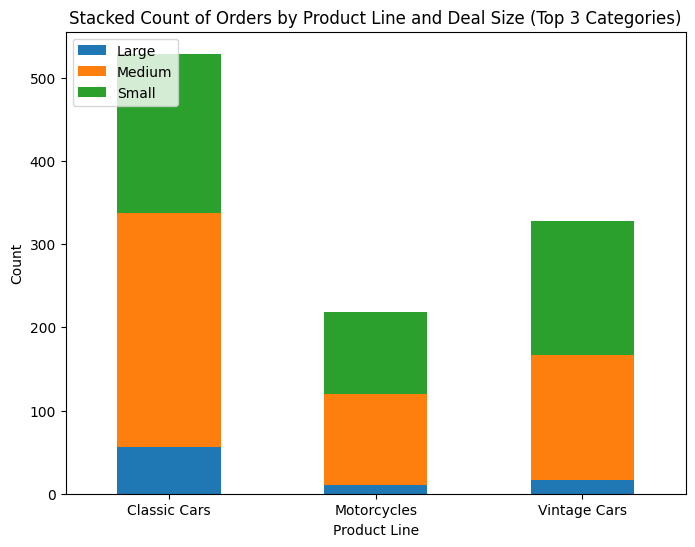

In [31]:
df_stacked_plot = pd.crosstab(index=top3_data['PRODUCTLINE'], columns=top3_data['DEALSIZE'])

df_stacked_plot.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.title('Stacked Count of Orders by Product Line and Deal Size (Top 3 Categories)')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.show()

Boxplot

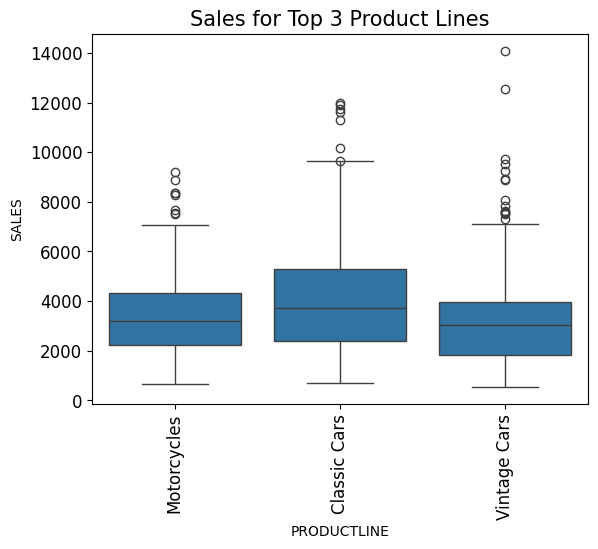

In [32]:
sns.boxplot(x='PRODUCTLINE', y='SALES', data=top3_data)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Sales for Top 3 Product Lines', fontsize=15)
plt.show()

Bar Plot

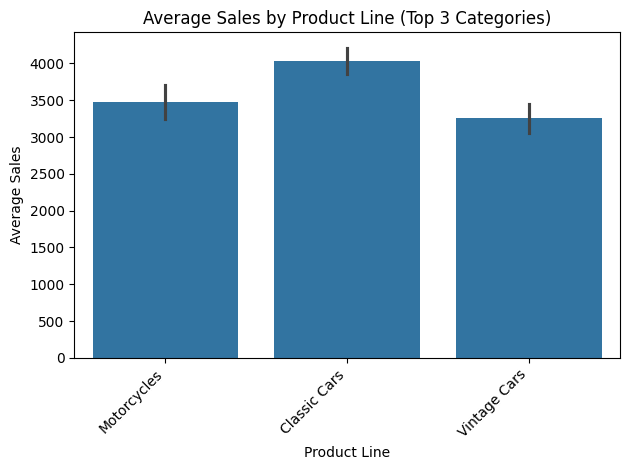

In [33]:
sns.barplot(data=top3_data, x="PRODUCTLINE", y="SALES", estimator=np.mean)
plt.title('Average Sales by Product Line (Top 3 Categories)')
plt.xlabel('Product Line')
plt.ylabel('Average Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Subplots

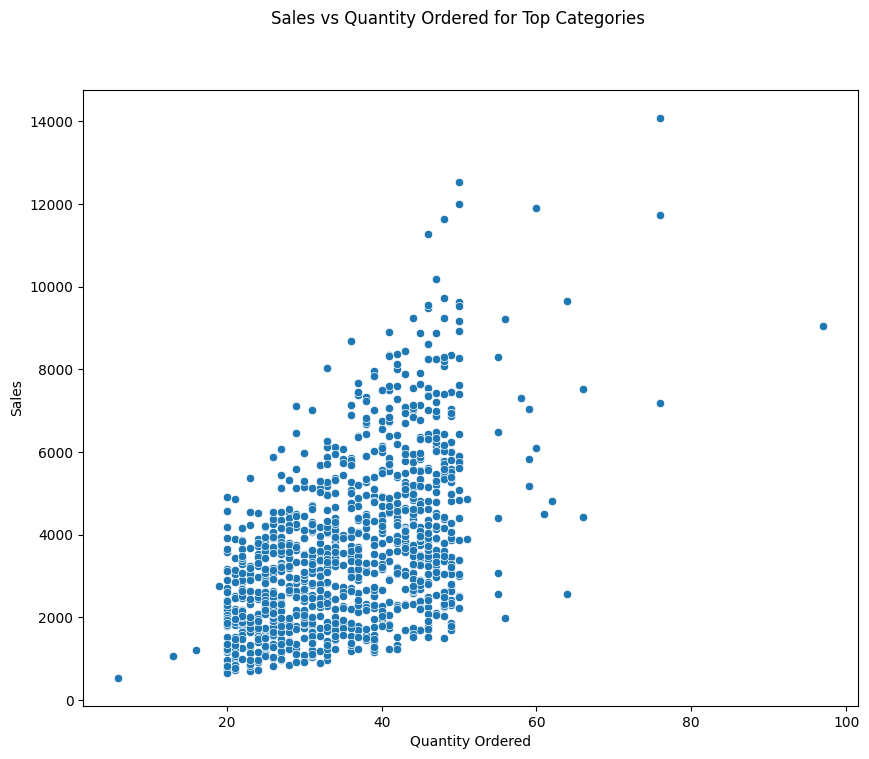

In [34]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x=top3_data['QUANTITYORDERED'], y=top3_data['SALES'])
fig.suptitle('Sales vs Quantity Ordered for Top Categories')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()

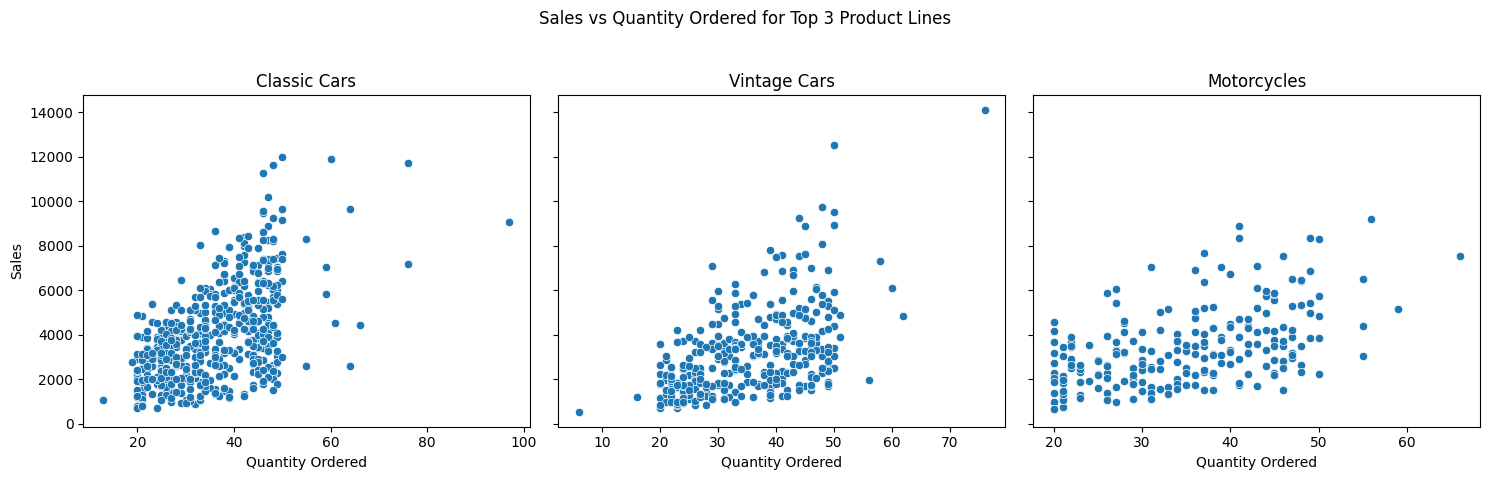

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Sales vs Quantity Ordered for Top 3 Product Lines')

for i, product_line in enumerate(top3_productline):
    sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=top3_data[top3_data['PRODUCTLINE'] == product_line], ax=axes[i])
    axes[i].set_title(product_line)
    axes[i].set_xlabel('Quantity Ordered')
    axes[i].set_ylabel('Sales')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

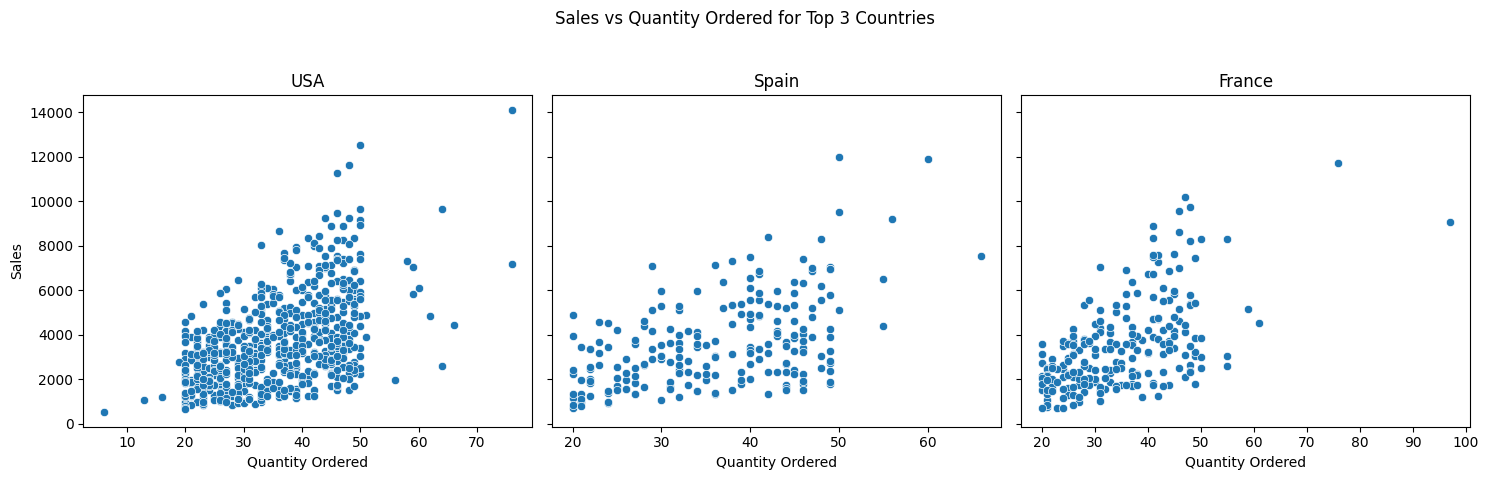

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Sales vs Quantity Ordered for Top 3 Countries')

for i, country in enumerate(top3_country):
    sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=top3_data[top3_data['COUNTRY'] == country], ax=axes[i])
    axes[i].set_title(country)
    axes[i].set_xlabel('Quantity Ordered')
    axes[i].set_ylabel('Sales')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [38]:
# print(ax)

ValueError: Could not interpret value `NA_Sales` for `x`. An entry with this name does not appear in `data`.

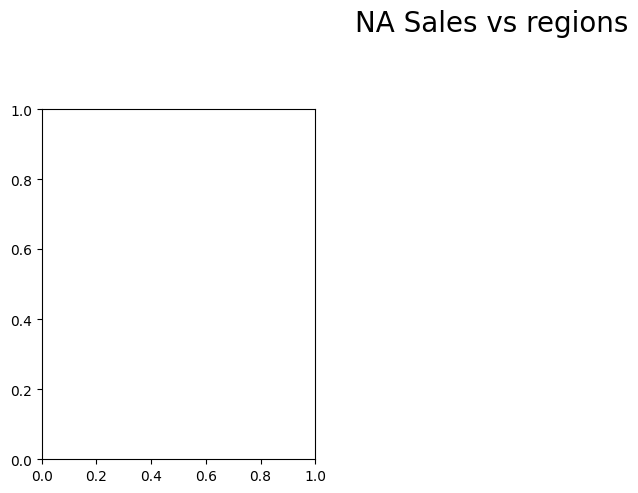

In [39]:
plt.figure(figsize=(12,10)).suptitle("NA Sales vs regions",fontsize=20)

# using a 2x3 subplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)

plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')

plt.subplot(2, 3, 4)
sns.scatterplot(x='NA_Sales', y='Other_Sales', data=top3_data, color='green')

plt.subplot(2, 3, 6)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=top3_data, color='orange')

plt.show()

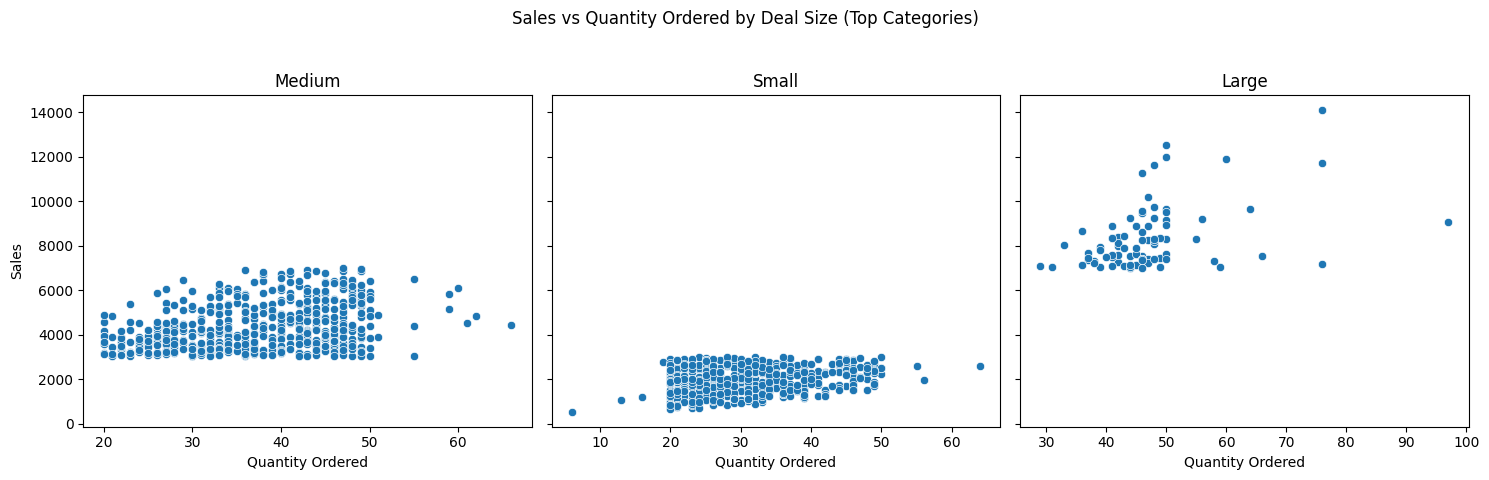

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Sales vs Quantity Ordered by Deal Size (Top Categories)')

for i, dealsize in enumerate(top3_dealsize):
    sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=top3_data[top3_data['DEALSIZE'] == dealsize], ax=axes[i])
    axes[i].set_title(dealsize)
    axes[i].set_xlabel('Quantity Ordered')
    axes[i].set_ylabel('Sales')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

ValueError: Could not interpret value `NA_Sales` for `x`. An entry with this name does not appear in `data`.

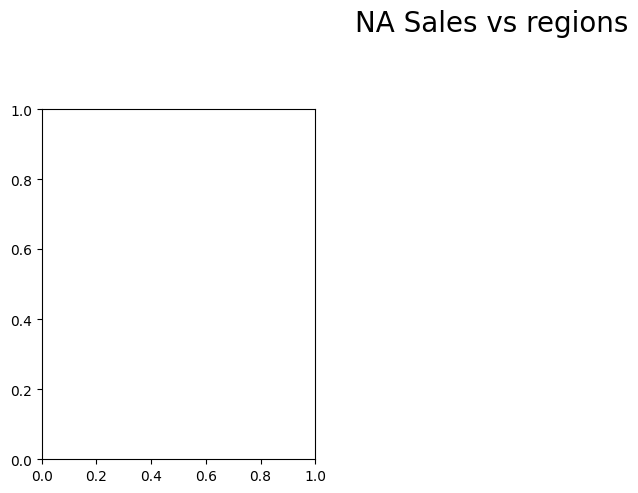

In [41]:
plt.figure(figsize=(12,10)).suptitle("NA Sales vs regions",fontsize=20)

# using a 2x3 subplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)
plt.title('NA vs EU Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('EU', fontsize=12)

plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')
plt.title('NA vs JP Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('JP', fontsize=12)

plt.subplot(2, 3, 4)
sns.scatterplot(x='NA_Sales', y='Other_Sales', data=top3_data, color='green')
plt.title('NA vs Other Region Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Other', fontsize=12)

plt.subplot(2, 3, 6)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=top3_data, color='orange')
plt.title('NA vs Global Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Global', fontsize=12)

plt.show()

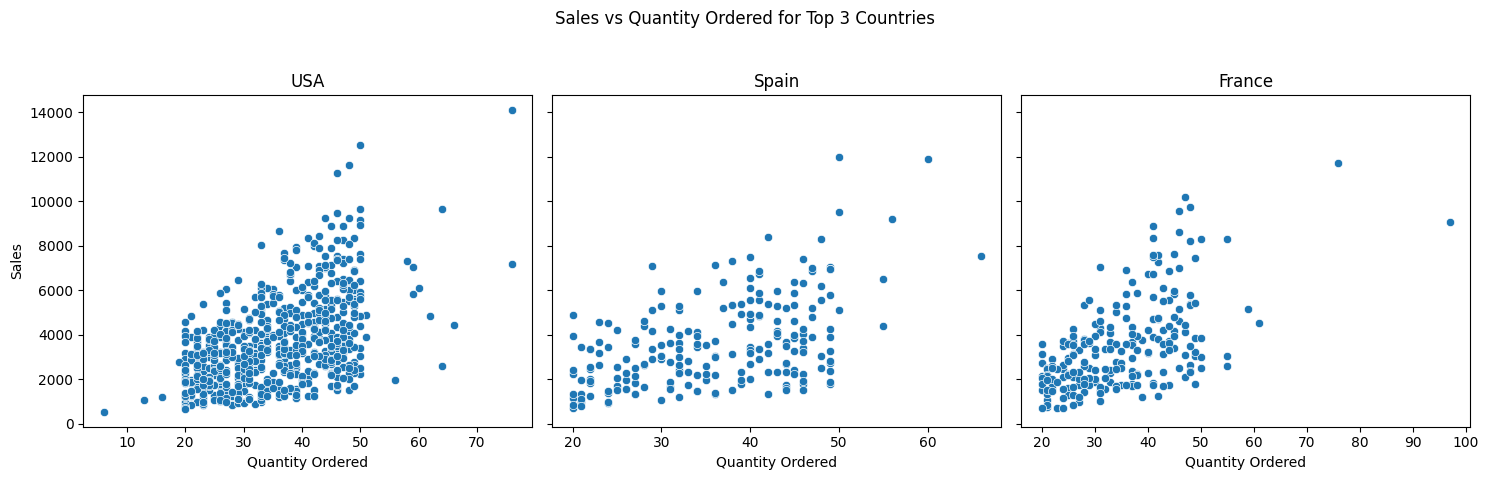

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Sales vs Quantity Ordered for Top 3 Countries')

for i, country in enumerate(top3_country):
    sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=top3_data[top3_data['COUNTRY'] == country], ax=axes[i])
    axes[i].set_title(country)
    axes[i].set_xlabel('Quantity Ordered')
    axes[i].set_ylabel('Sales')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

ValueError: Could not interpret value `NA_Sales` for `x`. An entry with this name does not appear in `data`.

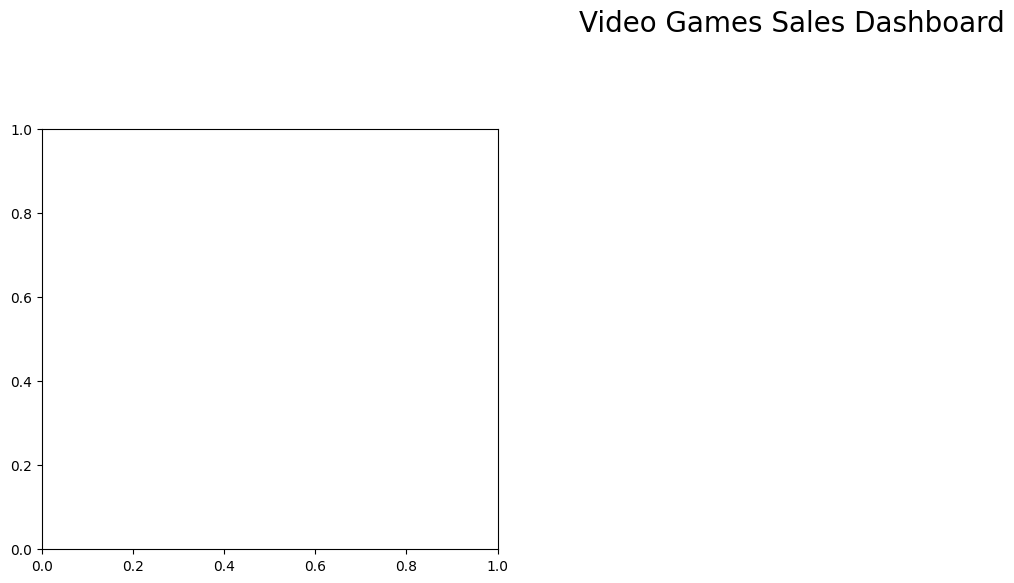

In [43]:
plt.figure(figsize=(20,12)).suptitle("Video Games Sales Dashboard",fontsize=20)

# using a 2x3 subplot
plt.subplot(2, 3, 1)
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=top3_data)
plt.title('NA vs EU Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('EU', fontsize=12)

plt.subplot(2, 3, 3)
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=top3_data, color='red')
plt.title('NA vs JP Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('JP', fontsize=12)

# Countplot of publishers
plt.subplot(1,3,2)
sns.countplot(x='Publisher', data=top3_data)
plt.title('Count of games by each Publisher', fontsize=12)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Count of games', fontsize=12)

plt.subplot(2, 3, 4)
sns.scatterplot(x='NA_Sales', y='Other_Sales', data=top3_data, color='green')
plt.title('NA vs Other Region Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Other', fontsize=12)

plt.subplot(2, 3, 6)
sns.scatterplot(x='NA_Sales', y='Global_Sales', data=top3_data, color='orange')
plt.title('NA vs Global Sales', fontsize=12)
plt.xlabel('NA', fontsize=12)
plt.ylabel('Global', fontsize=12)

plt.show()

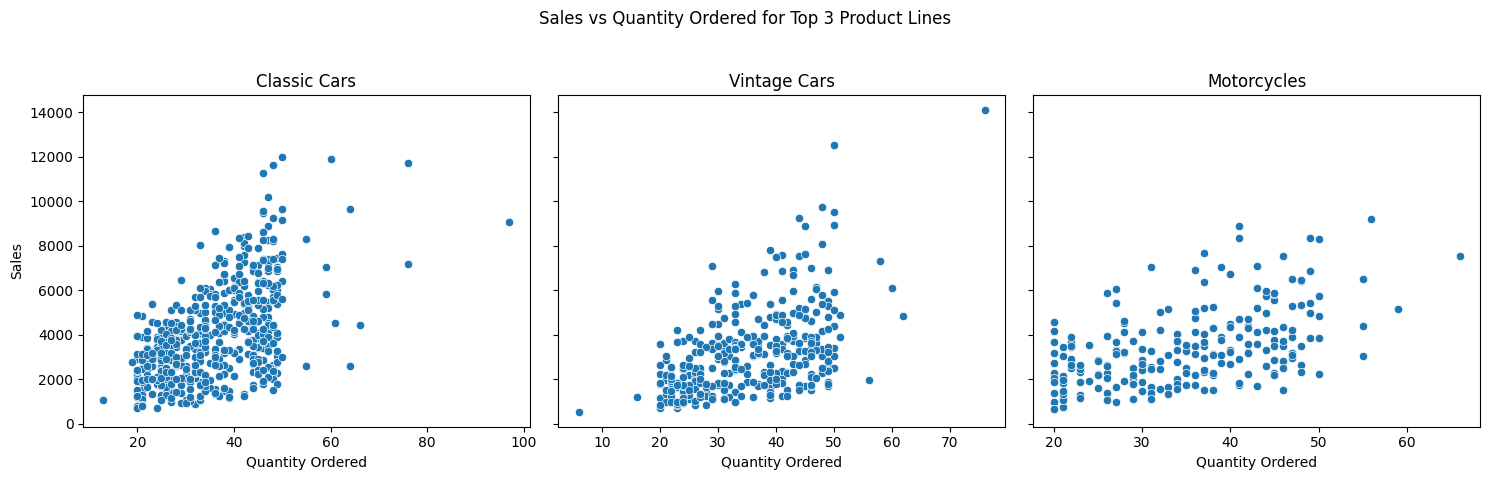

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Sales vs Quantity Ordered for Top 3 Product Lines')

for i, product_line in enumerate(top3_productline):
    sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=top3_data[top3_data['PRODUCTLINE'] == product_line], ax=axes[i])
    axes[i].set_title(product_line)
    axes[i].set_xlabel('Quantity Ordered')
    axes[i].set_ylabel('Sales')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()